In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi
import strawberryfields as sf
from strawberryfields import ops
from functions import print_matrix, Bj, COB_CovMtx, COB_Means, split, SimonCriterion, TM_LogNegativity, Omega, PT_CovMtx  
from thewalrus.quantum import log_negativity
from thewalrus.decompositions import symplectic_eigenvals

#sf.hbar=1 #Defined to coincide with Jonatan notation of results (SF uses by default hbar = 2)

2023-05-17 22:55:52.195051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Action of first beam-splitter

![alt text](BS1.jpg)

In [2]:
prog = sf.Program(2)

with prog.context as q:
    
    ops.Squeezed(r=0.5, p=0) | q[0]  #squeezing  along x (phase = 0)
    #ops.Squeezed(r=0.5, p=pi) | q[1]  #squeezing  along p (phase = pi)
    #ops.Coherent(r=1.6, phi=0) | q[1]  #Coherent 5+2j = 5.39e^i0.38


    #Mix squeezed mode and vaccum q[1] on a Beam-splitter
    ops.BSgate(theta=pi/4, phi=0) | (q[0],q[1])
    
eng = sf.Engine("gaussian")
state=eng.run(prog).state

In [3]:
cov_mtx=state.cov() #Covariance matrix V on StrawberryFields basis 

#Applying transfromation of basis from SF (r=[x1,x2,...,x1,...,xn]) to Jonatan (r=[x1,p1,...,xn,pn])
cov_mtx2=COB_CovMtx(cov_mtx) 

cov_mtx2[abs(cov_mtx2) < 1e-11] = 0 #Defining a threshold value 
print_matrix(cov_mtx2)

<IPython.core.display.Math object>

In [4]:
means=state.means() #Covariance matrix V on StrawberryFields basis 

#Applying transfromation of basis from SF (r=[x1,x2,...,x1,...,xn]) to Jonatan (r=[x1,r1,...,xn,pn])
means2=COB_Means(means) 

means2[abs(means2) < 1e-11] = 0 #Defining a threshold value 
print_matrix(means2)

<IPython.core.display.Math object>

## Simon criterion for bipartite entanglenment

To apply the Simon criterion for two-mode bipartite system we follow the following steps:

1. Write the covariance matix in the block form:
$$\sigma=\left(\begin{array}{cc}\sigma_A & \sigma_{AB} \\ \sigma_{AB}^T & \sigma_B\end{array}\right)$$
2. Apply the necessary and sufficient condition for bipartite gaussian states: $$det\sigma_A det\sigma_B + \left ( \frac{\hbar}{4}-|det \sigma_{AB}| \right )^2 - tr(\sigma_A J \sigma_{AB} J \sigma_B J \sigma_{AB}^T J) \geq \frac{\hbar}{4}(det \sigma_A + \sigma_B)  $$

We implemented the previous algorithm in the function *SimonCriterion()* 

In [5]:
SimonCriterion(cov_mtx2,hbar=sf.hbar)

The bipartite system is entangled


## Logarithmic negativity

In [6]:
#using default function of thewalrus for logarithmic negativity (it uses log in base e)
En=log_negativity(cov_mtx, split=1)*np.log2(np.e) 
print("The logarithmic negativity of the system is:", En)

The logarithmic negativity of the system is: 0.7213475204444817


# Action of all beam-splitters

![alt text](setup.jpg)

In [7]:
prog = sf.Program(4)

with prog.context as q:
    
    ops.Squeezed(r=0.5, p=0) | q[0]  #squeezing  along x (phase = 0) 
    ops.Squeezed(r=0.5, p=pi) | q[1]  #squeezing  along p (phase = pi) 
    #ops.Squeezed(r=0.5, p=0) | q[1]  #squeezing  along x (phase = 0) 


    #Mix squeezed mode and vaccum q[1] on a Beam-splitter
    ops.BSgate(theta=pi/4, phi=0) | (q[0],q[1])
    #Mix the first ouput mode with vaccum q[2] on a Beam-splitter 
    ops.BSgate(theta=pi/4, phi=0) | (q[0],q[2]) 
    #Mix the second ouput mode with vaccum q[3] on a Beam-splitter 
    ops.BSgate(theta=pi/4, phi=0) | (q[1],q[3]) 

    
eng = sf.Engine("gaussian")
state=eng.run(prog).state

In [8]:
cov_mtx=state.cov() #Covariance matrix V on StrawberryFields basis 

#Applying transfromation of basis from SF (r=[x1,x2,...,x1,...,xn]) to Jonatan (r=[x1,r1,...,xn,pn])
cov_mtx2=COB_CovMtx(cov_mtx) 

cov_mtx2[abs(cov_mtx2) < 1e-11] = 0 #Defining a threshold value 
print_matrix(cov_mtx2)

<IPython.core.display.Math object>

In [9]:
mean_vector=state.means()
mean_vector2=COB_Means(mean_vector) 
print_matrix(mean_vector2)

<IPython.core.display.Math object>

## Entanglenment caracterization

### Modes $|e \rangle$ y $|f \rangle$

In [10]:
reduced=state.reduced_gaussian([0,2])
reducedCov1=reduced[1]
reducedCov1[abs(reducedCov1) < 1e-10] = 0 #Defining a threshold value 
reducedCov2=COB_CovMtx(reducedCov1)
print_matrix(reducedCov2)

<IPython.core.display.Math object>

In [11]:
SimonCriterion(reducedCov2,hbar=sf.hbar)

The bipartite system is separable


In [12]:
#using default function of thewalrus for logarithmic negativity (it uses log in base e)
En=log_negativity(reducedCov1, split=1)*np.log2(np.e) 
print("The logarithmic negativity of the system is:", En)

The logarithmic negativity of the system is: 0.0


### Modes $|d \rangle$ y $|c \rangle$

In [13]:
reduced=state.reduced_gaussian([1,3])
reducedCov3=reduced[1]
reducedCov3[abs(reducedCov3) < 1e-10] = 0 #Defining a threshold value 
reducedCov4=COB_CovMtx(reducedCov3)
print_matrix(reducedCov4)

<IPython.core.display.Math object>

In [14]:
SimonCriterion(reducedCov4,hbar=sf.hbar)

The bipartite system is separable


In [15]:
#using default function of thewalrus for logarithmic negativity (it uses log in base e)
En=log_negativity(reducedCov3, split=1)*np.log2(np.e) 
print("The logarithmic negativity of the system is:", En)

The logarithmic negativity of the system is: 0.0


### Modes $|d \rangle$ y $|f \rangle$

In [34]:
reduced=state.reduced_gaussian([0,3])
reducedCov5=reduced[1]
reducedCov5[abs(reducedCov1) < 1e-10] = 0 #Defining a threshold value 
reducedCov6=COB_CovMtx(reducedCov5)
print_matrix(reducedCov6)

<IPython.core.display.Math object>

In [35]:
SimonCriterion(reducedCov6,hbar=sf.hbar)

The bipartite system is entangled


In [36]:
En=log_negativity(reducedCov5, split=1)*np.log2(np.e) 
print("The logarithmic negativity of the system is:", En)

The logarithmic negativity of the system is: 0.5480589169169523


### Logarithmic negativity for bipartition ed,cf

First we should calculate partial transposition of $\sigma$ with the following procedure: 

1. Generate linear operator $T$ asociated with the partial transposition $T=\mathbb{1}_{2m} \oplus \bigoplus_{j=1}^{n} \sigma_z $ 
2. Calculate partial transposition of covariance matrix as $\tilde{\sigma} =T \sigma T $

We implemented the previous algorithm in the function *PT_CovMtx()* 

In [19]:
cov_mtx2_pt=PT_CovMtx(cov_mtx2, [2,3], "normal")

To calculate symplectic eigenvalues ($\tilde{\nu_j}$) of partial transposed covariance matrix $\tilde{\sigma}$ we can use the fact that symplectic eigenvalues are the absolute values of the eigenvalues of $i\Omega \sigma$. Then,
$ \tilde{\nu_j}$ are the absolute value of the eigenvalues of the matrix $i\Omega \tilde {\sigma}$   

In [20]:
aux=1j*Omega(4)@cov_mtx2_pt
complx=np.linalg.eig(aux)[0]

symplectic_eig = [x.real for x in complx if x.real > 0]
symplectic_eig=np.array(symplectic_eig)
symplectic_eig

array([0.60653066, 1.64872127, 1.64872127, 0.60653066])

By default The Walrus library has a function to calculate sympeplectic eigenvalues, lets compare our results

In [21]:
#We should traspose xp-order covariance matrix beacuse the The Walrus function works with xp-order
cov_mtx_pt=PT_CovMtx(cov_mtx, [2,3], "xp") 
symplectic_eigenvals(cov_mtx_pt)

array([0.60653066, 0.60653066, 1.64872127, 1.64872127])

With the partial transposed symplectic eigenvalues, now we can calculate the logarithmic negativity with the following expression:
$E_{\mathcal{N}}=\sum_{j=1}^{m+n} max \{0,-log_2 ({\tilde{\nu_j})}\}$



In [22]:
log2 = -np.log2(symplectic_eig)

Enm = 0
for x in log2:
    Enm += np.max([0,x])
    
print("The logarithmic negativity of the system is:", Enm)

The logarithmic negativity of the system is: 1.4426950408889643


By default The Walrus library has a function to calculate logarithmic negativity, lets compare our results

In [23]:
#using default function of thewalrus for logarithmic negativity (it uses log in base e)
En=log_negativity(cov_mtx, split=2)*np.log2(np.e) 
print("The logarithmic negativity of the system is:", En)

The logarithmic negativity of the system is: 1.4426950408889634


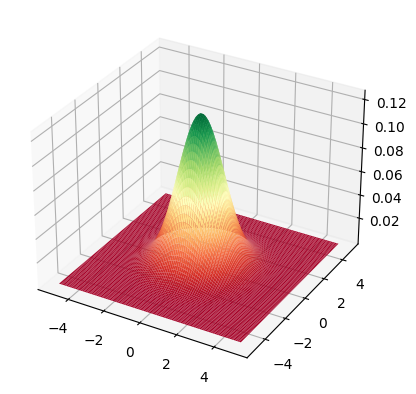

In [24]:
fig = plt.figure()
X = np.linspace(-5, 5, 100)
P = np.linspace(-5, 5, 100)
Z = state.wigner(3, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(4.8, 5)
#ax.set_axis_off()